In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression 

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm=LinearRegression()
lm 

LinearRegression()

In [5]:
X=df[['highway-mpg']]
Y=df['price']

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
lm.coef_

array([-821.73337832])

In [9]:
lm.intercept_

38423.305858157386

### The linear regression model : 
Price = 38423.31 - 821.73 x highway-mpg

In [10]:
lm1=LinearRegression()
lm1

LinearRegression()

In [11]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression()

In [12]:
lm1.intercept_

array([-7963.33890628])

In [13]:
lm1.coef_

array([[166.86001569]])

### The linear Regression Model 
Price=-7963.34 + 166.86*engine-size


# Multiple Regression Model 

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
lm.fit(Z,df['price'])

LinearRegression()

In [16]:
lm.intercept_

-15806.624626329198

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### The Multiple Linear Regression Model :
Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [18]:
#Creating and evaluating a model 

In [19]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']],df['price'])

LinearRegression()

In [20]:
lm2.coef_

array([   1.49789586, -820.45434016])

### Evaluating the Model 

In [21]:
import seaborn as sns 
%matplotlib inline 

(0.0, 48168.00861976736)

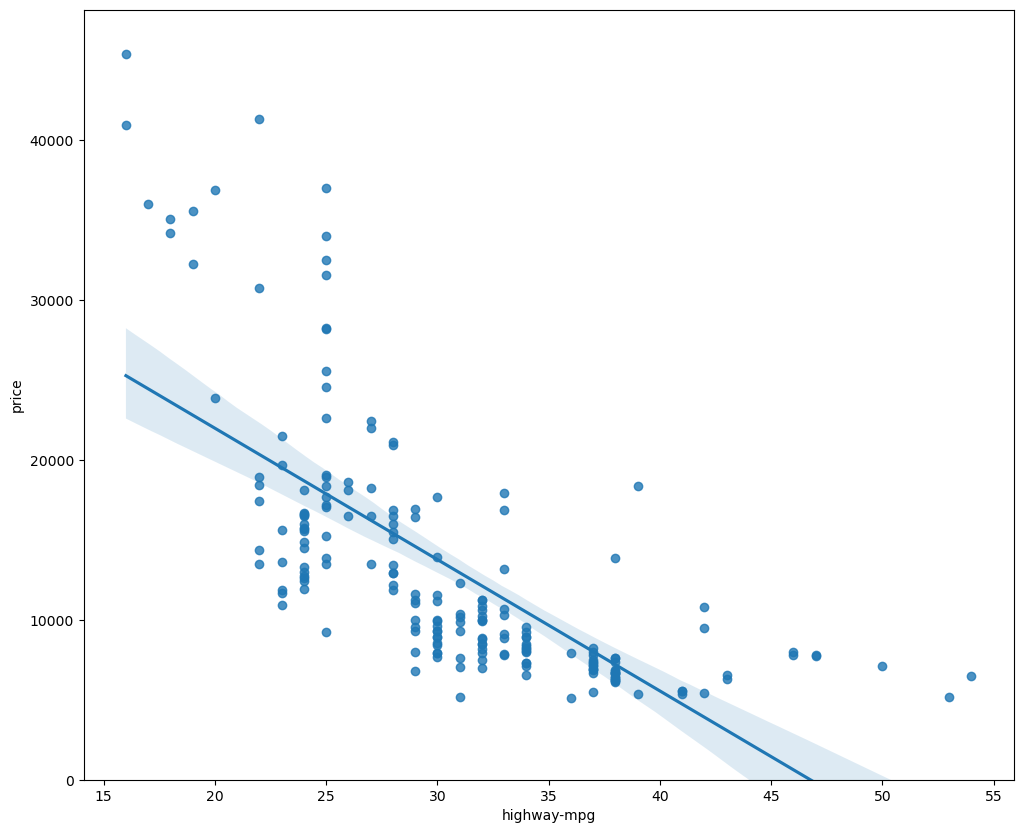

In [22]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)


In [23]:
# peak-rpm regression plot

(0.0, 47414.1)

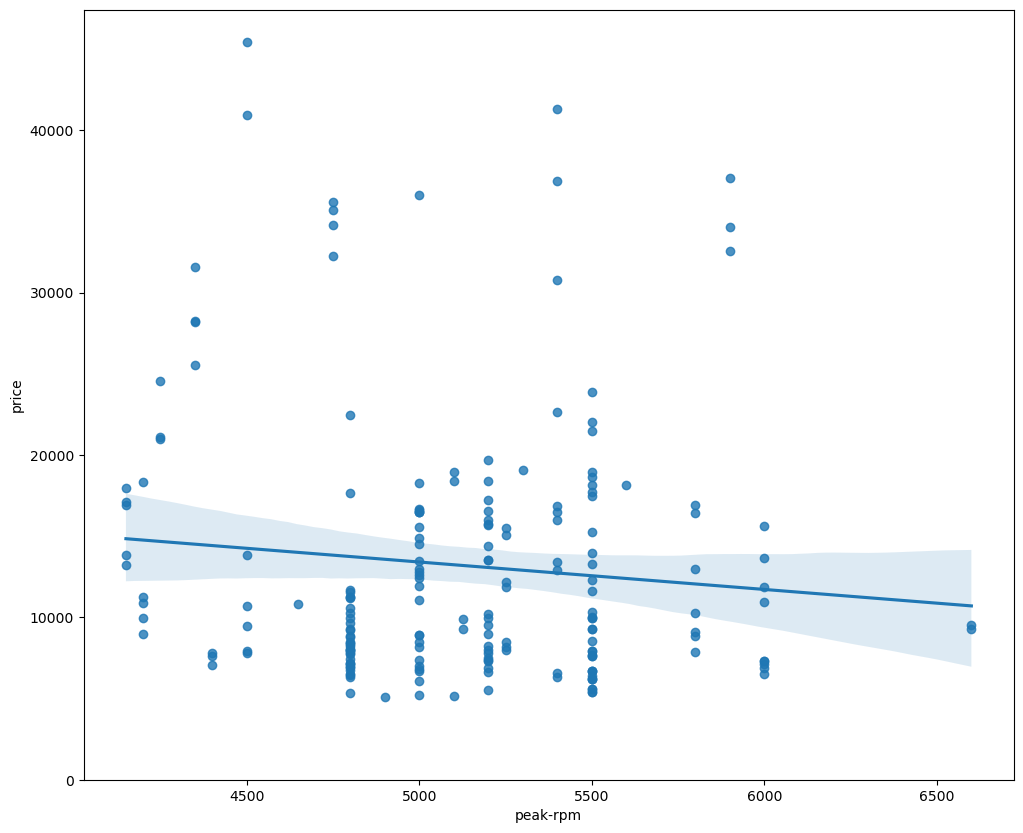

In [24]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [25]:
df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


the variable "highway-mpg" has a stronger correlation with "price" compared to "peak-rpm"

####Residaul Plot

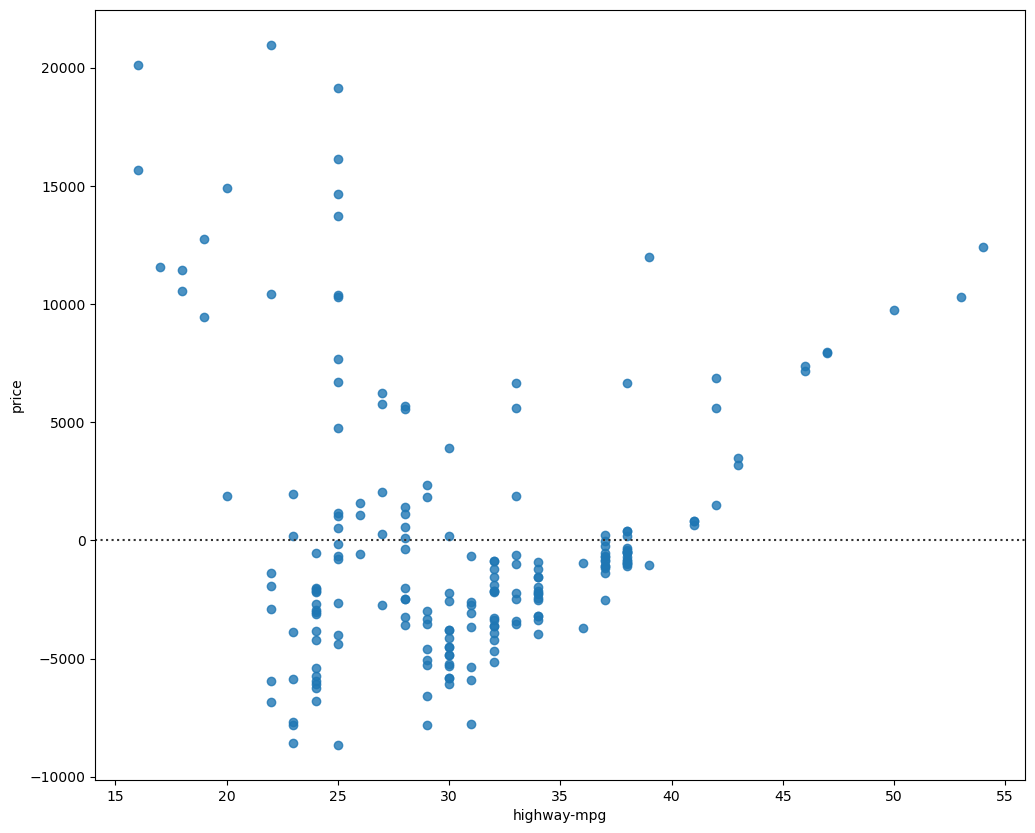

In [26]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'] , y=df['price'])
plt.show()

In [27]:
# Plotting a Multiple Linear Regression 

In [28]:
#distribution plot 
from seaborn import distplot

In [29]:
Y_hat=lm.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


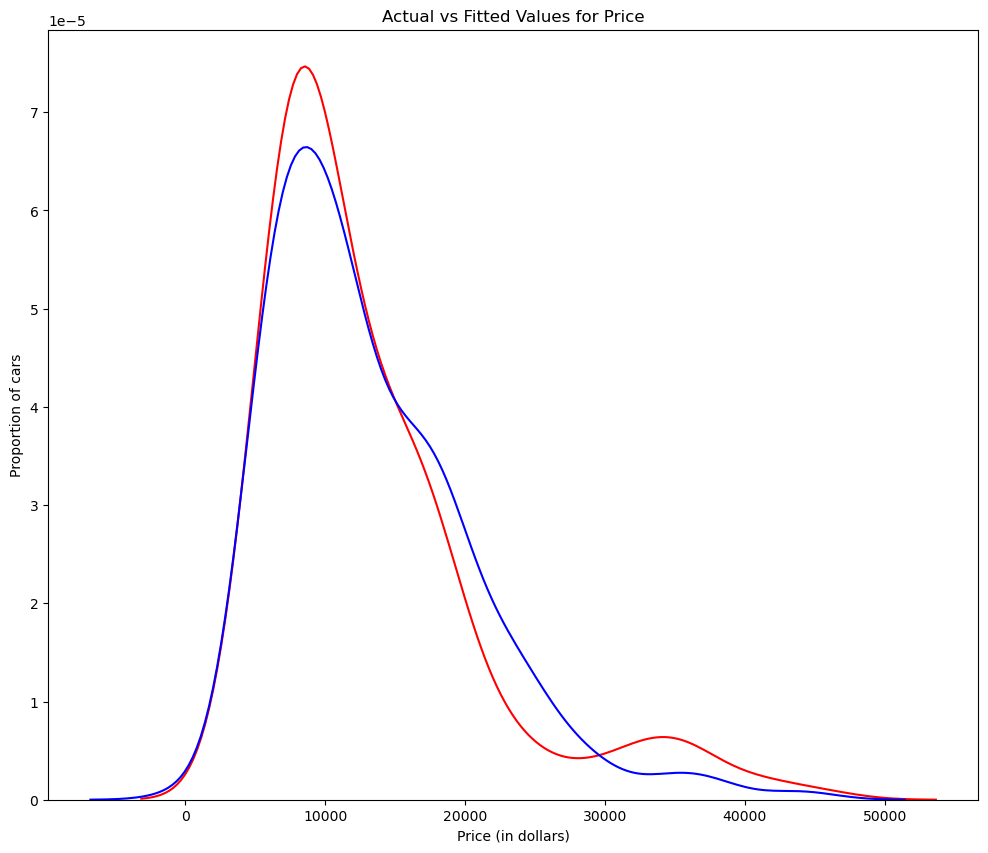

In [30]:
plt.figure(figsize=(width,height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()


# Polynomial Regression 

In [31]:
def PlotPolly(model,independent_variable,dependent_variable,Name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title('Polynomial Fit with Matplotlib for Price ')
    ax=plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))    
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of cars')
    plt.show()
    plt.close()

In [32]:
x=df['highway-mpg']
y=df['price']

In [33]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


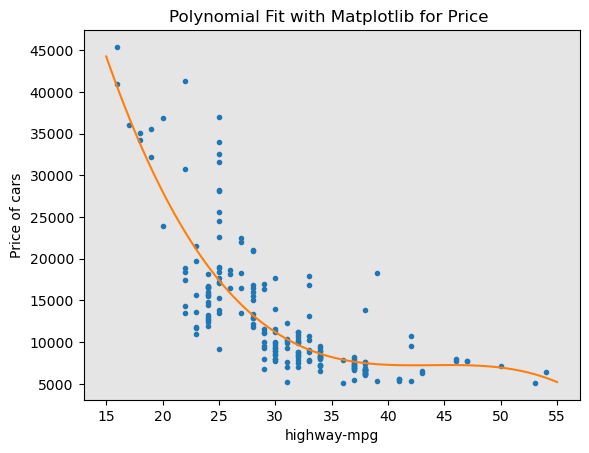

In [34]:
PlotPolly(p,x,y,'highway-mpg')

In [35]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [38]:
Z_pr=pr.fit_transform(Z)

In [39]:
Z.shape

(201, 4)

In [40]:
Z_pr.shape

(201, 15)

# Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [43]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [44]:
Z=Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [46]:
#Creating a pipeline that standardizes the data ,then produce a prediction using a linear regression model 

In [47]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### Measures for In-Sample Evaluation 
R^(2)
MSE

In [48]:
lm.fit(X,Y)
print('The R-square is :',lm.score(X,Y))

The R-square is : 0.4965911884339175


In [49]:
Yhat=lm.predict(X)
print(Yhat[0:5])

[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]


In [50]:
from sklearn.metrics import mean_squared_error 

In [51]:
mse=mean_squared_error(df['price'],Yhat)
print(mse)

31635042.944639895


In [52]:
#For multiple Linear Regression 

In [53]:
lm.fit(Z,df['price'])
print('The R_square is :', lm.score(Z,df['price']))

The R_square is : 0.8093562806577457


In [54]:
Y_predict_multifit=lm.predict(Z)

In [55]:
print(mean_squared_error(df['price'],Y_predict_multifit))

11980366.87072649


In [56]:
#Polynomial Fit 

In [57]:
from sklearn.metrics import r2_score

In [58]:
r_squared=r2_score(y,p(x))
print(r_squared)

0.674194666390652


In [59]:
#MSE

In [60]:
#Prediction and Decision Making

In [61]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [62]:
new_input=np.arange(1,100,1).reshape(-1,1)

In [63]:
lm.fit(X,Y)
lm

LinearRegression()

In [64]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])